In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import plotnine as gg
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn.manifold import TSNE
from palettable.colorbrewer.sequential import *
from pathlib import Path
import umap.umap_ as umap



## UMAP analysis

In [3]:
path = Path("../collated/")
outpath = Path("../Figures_new/UMAP")
fname = "C-7210-01-CMP-008-gray_collapsed_sampled.csv"
fpath = os.path.join(path, fname)
df = pd.read_csv(fpath)


metadata = [col for col in df.columns if "Metadata" in col]
variables = [col for col in df.columns if not "Metadata" in col]


metadata


['Metadata_Plate',
 'Metadata_Well',
 'Metadata_broad_sample',
 'Metadata_Assay_Plate_Barcode',
 'Metadata_Plate_Map_Name',
 'Metadata_cell_line',
 'Metadata_well_position',
 'Metadata_mg_per_ml',
 'Metadata_mmoles_per_liter',
 'Metadata_solvent',
 'Metadata_cell_id',
 'Metadata_pert_id',
 'Metadata_pert_mfc_id',
 'Metadata_pert_well',
 'Metadata_pert_id_vendor',
 'Metadata_broad_sample_type',
 'Metadata_pert_vehicle',
 'Metadata_pert_type',
 'Metadata_label',
 'Metadata_chemist',
 'Metadata_compound_name',
 'Metadata_Annotation',
 'Metadata_Target',
 'Metadata_Broad_barcode']

In [4]:
df['Metadata_Target'].replace(np.nan, 'NA', inplace=True)
df['Metadata_Annotation'].replace('active ', 'active', inplace=True)

excluded = ["C1", "C2", "C3", "C4"]
d = df.query('Metadata_cell_line == "A549" and Metadata_compound_name not in @ excluded')




#p = [('NA', 'DCLK1'), ('NA', 'PIN1'), ('NA', 'ERK5'), ('NA', 'FAK'), ('NA', 'CDK14 / pan-TAIRE'), ('NA', 'SECRET')]
# p = ['NA', 'DCLK1']


     




In [5]:
d.Metadata_cell_line.unique()

array(['A549'], dtype=object)

# kruskal Wallis test

In [6]:
from scipy import stats

p = ['NA', 'DCLK1']

tmp = d.query("Metadata_Target in @p")




kw = []

for i in variables:
    test = tmp.Metadata_compound_name.unique().tolist()
    gp1 = tmp.query("Metadata_compound_name in @ test[0]")[i].tolist()
    gp2 = tmp.query("Metadata_compound_name in @ test[1]")[i].tolist()
    gp3 = tmp.query("Metadata_compound_name in @ test[2]")[i].tolist()
    

    k1 = stats.kruskal(gp1, gp2)
    k2 = stats.kruskal(gp1, gp3)
    k3 = stats.kruskal(gp2, gp3)



    d1 = {"Paired": [test[0]+', '+ test[1], test[0]+', '+ test[2], test[1]+', '+ test[2]],
      "Statistics": [k1[0], k2[0], k3[0]],
      "P-value": [k1[1], k2[1], k3[1]],
      "Variables": str(i)}



    prf = pd.DataFrame(d1, columns = ['Paired','Statistics', 'P-value', 'Variables'])
    
    kw.append(prf)
final_kw = pd.concat(kw)
    
final_kw['logp'] = -log10(final_kw['P-value'])
index = [i for i in range(1, len(final_kw) +1)]
final_kw['index'] =  index
final_kw.head()   

,Paired,Statistics,P-value,Variables,logp,index
0,"DMSO, FMF-03-146-1",14.145927,0.000169,Cells_AreaShape_Area,3.771695,1
1,"DMSO, FMF-04-112-1",11.157290,0.000837,Cells_AreaShape_Area,3.077264,2
2,"FMF-03-146-1, FMF-04-112-1",1.102941,0.293622,Cells_AreaShape_Area,0.532212,3
0,"DMSO, FMF-03-146-1",0.077893,0.780174,Cells_AreaShape_Compactness,0.107809,4
1,"DMSO, FMF-04-112-1",10.659848,0.001095,Cells_AreaShape_Compactness,2.960640,5


In [7]:
final_kw.head()

,Paired,Statistics,P-value,Variables,logp,index
0,"DMSO, FMF-03-146-1",14.145927,0.000169,Cells_AreaShape_Area,3.771695,1
1,"DMSO, FMF-04-112-1",11.157290,0.000837,Cells_AreaShape_Area,3.077264,2
2,"FMF-03-146-1, FMF-04-112-1",1.102941,0.293622,Cells_AreaShape_Area,0.532212,3
0,"DMSO, FMF-03-146-1",0.077893,0.780174,Cells_AreaShape_Compactness,0.107809,4
1,"DMSO, FMF-04-112-1",10.659848,0.001095,Cells_AreaShape_Compactness,2.960640,5


In [120]:
final_kw.to_csv("DCLK_kw.csv", index=False)

In [89]:
# tt = []
# for v in final_kw.Variables.unique():
    
#     tv = final_kw.query('Variables in @ v')
    
#     if (tv.iloc[0]["P-value"] < 0.05) & (tv.iloc[1]["P-value"] < 0.05) & (tv.iloc[2]["P-value"] < 0.05):
        
#         tt.append(tv)
    
# tmp2 = pd.concat(tt)




1794

,Paired,Statistics,P-value,Variables,logp,index
0,"DMSO, FMF-03-146-1",14.145927,0.000169,Cells_AreaShape_Area,3.771695,1
1,"DMSO, FMF-04-112-1",11.157290,0.000837,Cells_AreaShape_Area,3.077264,2
2,"FMF-03-146-1, FMF-04-112-1",1.102941,0.293622,Cells_AreaShape_Area,0.532212,3
0,"DMSO, FMF-03-146-1",0.077893,0.780174,Cells_AreaShape_Compactness,0.107809,4
1,"DMSO, FMF-04-112-1",10.659848,0.001095,Cells_AreaShape_Compactness,2.960640,5


In [16]:
best_in_class = (final_kw
.sort_values(by="logp", ascending=False)
.groupby("Paired")
.head(5)
)
best_in_class

md = (final_kw
.groupby("Paired")['logp']
.median()
     )

md   
    
#geom_hline(aes(yintercept = med, group = gr), colour = 'red')

Paired
DMSO, FMF-03-146-1            2.790032
DMSO, FMF-04-112-1            2.162062
FMF-03-146-1, FMF-04-112-1    0.682818
Name: logp, dtype: float64

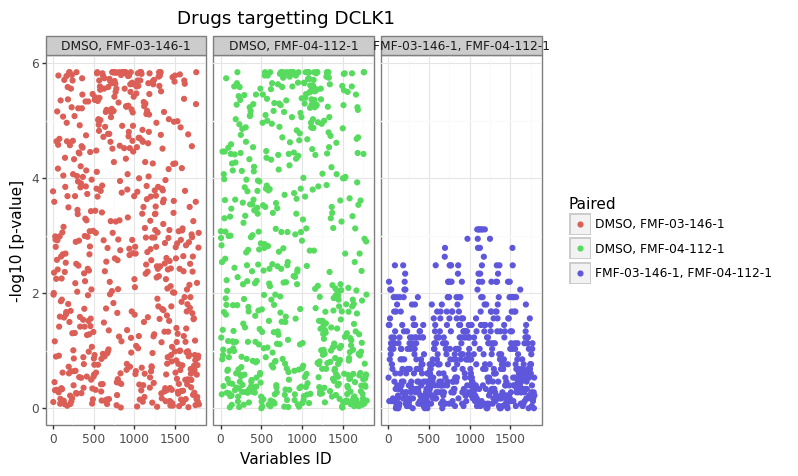

<ggplot: (7028417429)>

In [15]:
g = (ggplot(final_kw, gg.aes(x='index', y='logp', color= "Paired")) 
     + geom_point(size = 1.5) 
     + facet_wrap('~Paired')
     + theme_bw() 
     + geom_hline(aes(yintercept = med, group = gr), colour = 'red')
     #+ geom_text(aes(label="Variables"), data=best_in_class) 
     + labs(title='Drugs targetting DCLK1', x="Variables ID", y="-log10 [p-value] "))
  
 
g

In [79]:
+
  geom_text(aes(label=ifelse(PTS>24,as.character(Name),'')),hjust=0,vjust=0)

Object `plotnine` not found.


In [40]:

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

,Paired,Statistics,P-value,Variables
0,"DMSO, FMF-03-146-1",14.145927,0.000169,Cells_AreaShape_Area
1,"DMSO, FMF-04-112-1",11.157290,0.000837,Cells_AreaShape_Area
2,"FMF-03-146-1, FMF-04-112-1",1.102941,0.293622,Cells_AreaShape_Area
0,"DMSO, FMF-03-146-1",0.077893,0.780174,Cells_AreaShape_Compactness
1,"DMSO, FMF-04-112-1",10.659848,0.001095,Cells_AreaShape_Compactness
...,...,...,...,...
1,"DMSO, FMF-04-112-1",6.533827,0.010584,Nuclei_Texture_Variance_Mito_20_0
2,"FMF-03-146-1, FMF-04-112-1",1.102941,0.293622,Nuclei_Texture_Variance_Mito_20_0
0,"DMSO, FMF-03-146-1",0.031400,0.859350,Nuclei_Texture_Variance_RNA_10_0
1,"DMSO, FMF-04-112-1",0.110392,0.739698,Nuclei_Texture_Variance_RNA_10_0


In [234]:
#final_kw.loc[(final_kw['P-value'] < 0.05) & (final_kw['Paired'] < 0.05)]


,Paired,Statistics,P-value,Variables
0,"DMSO, FMF-03-146-1",17.674554,0.000026,Cells_AreaShape_Zernike_9_9
1,"DMSO, FMF-04-112-1",5.124575,0.023589,Cells_AreaShape_Zernike_9_9
2,"FMF-03-146-1, FMF-04-112-1",6.352941,0.011719,Cells_AreaShape_Zernike_9_9
0,"DMSO, FMF-03-146-1",18.124365,0.000021,Cells_Correlation_Correlation_ER_AGP
1,"DMSO, FMF-04-112-1",6.808424,0.009073,Cells_Correlation_Correlation_ER_AGP


In [233]:
ttt.head()




,Paired,Statistics,P-value,Variables
0,"DMSO, FMF-03-146-1",17.674554,-0.661009,Cells_AreaShape_Zernike_9_9
1,"DMSO, FMF-04-112-1",5.124575,-0.211463,Cells_AreaShape_Zernike_9_9
2,"FMF-03-146-1, FMF-04-112-1",6.352941,-0.285810,Cells_AreaShape_Zernike_9_9
0,"DMSO, FMF-03-146-1",18.124365,-0.670632,Cells_Correlation_Correlation_ER_AGP
1,"DMSO, FMF-04-112-1",6.808424,-0.310110,Cells_Correlation_Correlation_ER_AGP


In [226]:
def log_p(d):
    d['P-value'] = -log10(d['P-value'])
    return d

tp = log_p(ttt)
tp.head()

ttt

,Paired,Statistics,P-value,Variables
0,"DMSO, FMF-03-146-1",17.674554,-0.661009,Cells_AreaShape_Zernike_9_9
1,"DMSO, FMF-04-112-1",5.124575,-0.211463,Cells_AreaShape_Zernike_9_9
2,"FMF-03-146-1, FMF-04-112-1",6.352941,-0.285810,Cells_AreaShape_Zernike_9_9
0,"DMSO, FMF-03-146-1",18.124365,-0.670632,Cells_Correlation_Correlation_ER_AGP
1,"DMSO, FMF-04-112-1",6.808424,-0.310110,Cells_Correlation_Correlation_ER_AGP
...,...,...,...,...
1,"DMSO, FMF-04-112-1",20.338157,-0.714983,Nuclei_Texture_Gabor_Mito_10
2,"FMF-03-146-1, FMF-04-112-1",3.981618,-0.126212,Nuclei_Texture_Gabor_Mito_10
0,"DMSO, FMF-03-146-1",6.353903,-0.285862,Nuclei_Texture_Gabor_Mito_20
1,"DMSO, FMF-04-112-1",18.237701,-0.673022,Nuclei_Texture_Gabor_Mito_20


In [317]:


gp1 =df.query("Metadata_cell_line == 'U2OS' and Metadata_compound_name == 'FMF-04-159-2'")['Cells_AreaShape_Area'].tolist()
gp2 =df.query("Metadata_cell_line == 'U2OS' and Metadata_compound_name == 'FMF-05-176-1'")['Cells_AreaShape_Area'].tolist()
gp3 =df.query("Metadata_cell_line == 'U2OS' and Metadata_compound_name == 'DMSO'")['Cells_AreaShape_Area'].tolist()


from scipy import stats


stats.kruskal(gp1, gp2)


KruskalResult(statistic=11.294117647058826, pvalue=0.000777530446940383)

In [213]:
np.random.seed(123)
reducer=umap.UMAP()
embedding = reducer.fit_transform(df.loc[:, variables].values)


test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(df.loc[:, metadata], left_index=True, right_index=True)




In [214]:
combined.columns

Index(['UMAP-1', 'UMAP-2', 'Metadata_Plate', 'Metadata_Well',
       'Metadata_broad_sample', 'Metadata_Assay_Plate_Barcode',
       'Metadata_Plate_Map_Name', 'Metadata_cell_line',
       'Metadata_well_position', 'Metadata_mg_per_ml',
       'Metadata_mmoles_per_liter', 'Metadata_solvent', 'Metadata_cell_id',
       'Metadata_pert_id', 'Metadata_pert_mfc_id', 'Metadata_pert_well',
       'Metadata_pert_id_vendor', 'Metadata_broad_sample_type',
       'Metadata_pert_vehicle', 'Metadata_pert_type', 'Metadata_label',
       'Metadata_chemist', 'Metadata_compound_name', 'Metadata_Annotation',
       'Metadata_Target', 'Metadata_Broad_barcode'],
      dtype='object')

In [234]:
combined['Metadata_Target'].replace(np.nan, 'NA', inplace=True)
combined['Metadata_Annotation'].replace('active ', 'active', inplace=True)
combined['test']= combined['Metadata_compound_name']
combined['test'].replace(['DMSO', 'C1', 'C2', 'C3', 'C4'], 'controls', inplace=True)
combined['Metadata_test1'] = combined['test'] + "_" + combined['Metadata_Annotation'] + "_" + combined['Metadata_Target']  
combined['Metadata_test2'] = combined['test'] + "[" + combined['Metadata_Annotation'] + "]"
# combined['Metadata_Target4'].unique()
combined.Metadata_test1.unique()

array(['controls_control_NA', 'FMF-03-146-1_active_DCLK1',
       'BJP-06-115-3_inactive_PIN1', 'BJP-06-005-3_active_PIN1',
       'FMF-04-112-1_inactive_DCLK1', 'JWG-071_active_ERK5',
       'PND-1186_active_FAK', 'FMF-04-159-2_covalent_CDK14 / pan-TAIRE',
       'AX15836_active_ERK5', 'BSJ-04-030_inactive (protac)_SECRET',
       'FMF-05-176-1_reversible_CDK14 / pan-TAIRE',
       'JWG-119_inactive_ERK5', 'BSJ-03-136_active (protac)_SECRET'],
      dtype=object)

In [235]:
combined.Metadata_test2.unique()

array(['controls[control]', 'FMF-03-146-1[active]',
       'BJP-06-115-3[inactive]', 'BJP-06-005-3[active]',
       'FMF-04-112-1[inactive]', 'JWG-071[active]', 'PND-1186[active]',
       'FMF-04-159-2[covalent]', 'AX15836[active]',
       'BSJ-04-030[inactive (protac)]', 'FMF-05-176-1[reversible]',
       'JWG-119[inactive]', 'BSJ-03-136[active (protac)]'], dtype=object)

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures_new/UMAP/umap_compound_treatment_controls_DMSO.pdf


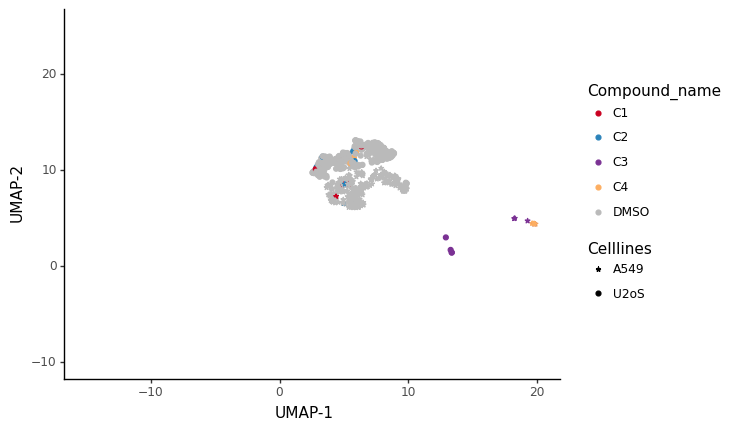

<ggplot: (7029515485)>

In [250]:
# options = ['controls[control]', 'FMF-03-146-1[active]', 'FMF-04-112-1[inactive]']


# d = combined.loc[combined['Metadata_test2'].isin(options)]

# d.head()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("DCLK1") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_DCLK.pdf', plot = g, path = outpath)

# g 


# options = ['controls[control]', 'BJP-06-005-3[active]', 'BJP-06-115-3[inactive]']

# d = combined.loc[combined['Metadata_test2'].isin(options)]

# d.head()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("PIN1") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_PIN1.pdf', plot = g, path = outpath)

# g 

# options = ['controls[control]', 'BSJ-03-136[active (protac)]', 'BSJ-04-030[inactive (protac)]']

# d = combined.loc[combined['Metadata_test2'].isin(options)]

# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("SECRET") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_SECRET.pdf', plot = g, path = outpath)

# g


# options = ['controls[control]', 'FMF-04-159-2[covalent]', 'FMF-05-176-1[reversible]']

# d = combined.loc[combined['Metadata_test2'].isin(options)]

# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("CDK14 / pan-TAIRE") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_CDK14pan-TAIRE.pdf', plot = g, path = outpath)

# g

# options = ['controls[control]', 'JWG-071[active]', 'AX15836[active]', 'JWG-119[inactive]']

# d = combined.loc[combined['Metadata_test2'].isin(options)]

# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("ERK5") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#7b3294", "#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_ERK5.pdf', plot = g, path = outpath)

# g


# options = ['controls[control]', 'PND-1186[active]']

# d = combined.loc[combined['Metadata_test2'].isin(options)]

# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test2', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("FAK") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#7b3294", "#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_FAK.pdf', plot = g, path = outpath)

# g

# options = ['C1', 'C2', 'C3', 'C4']

# d = combined.loc[combined['Metadata_compound_name'].isin(options)]

# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_compound_name', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#7b3294", "#fdae61"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_controls.pdf', plot = g, path = outpath)

# g

options = ['DMSO', 'C1', 'C2', 'C3', 'C4']

d = combined.loc[combined['Metadata_compound_name'].isin(options)]

g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_compound_name', shape="Metadata_cell_line")) + \
    gg.geom_point(size = 1.5) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#7b3294", "#fdae61", "#bababa"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
ggsave(filename='umap_compound_treatment_controls_DMSO.pdf', plot = g, path = outpath)

g



In [173]:
combined['Metadata_Target_new'] =combined['Metadata_Target'] 
combined['Metadata_Target_new'] = np.where(combined.Metadata_compound_name == 'DMSO', 'controls', combined.Metadata_Target_new)
combined['Metadata_Target_new'] = np.where(combined.Metadata_compound_name == 'C1', 'C1', combined.Metadata_Target_new)
combined['Metadata_Target_new'] = np.where(combined.Metadata_compound_name == 'C2', 'C2', combined.Metadata_Target_new)
combined['Metadata_Target_new'] = np.where(combined.Metadata_compound_name == 'C3', 'C3', combined.Metadata_Target_new)
combined['Metadata_Target_new'] = np.where(combined.Metadata_compound_name == 'C4', 'C4', combined.Metadata_Target_new)
combined['Metadata_Target2'] = combined['Metadata_Target']

combined['Metadata_Target2'] = combined['Metadata_Target2'].replace(np.nan, 'controls')
combined['Metadata_Target2'].unique()
combined['Metadata_Target3'] = combined['Metadata_Target2'] + "[" + combined['Metadata_Annotation'] + "]"

combined['Metadata_Target4'] = combined['Metadata_compound_name'] + "[" + combined['Metadata_Annotation'] + "]"

combined['Metadata_Target4'].unique()




array(['DMSO[control]', 'FMF-03-146-1[active]', 'BJP-06-115-3[inactive]',
       'BJP-06-005-3[active]', 'C4[control]', 'FMF-04-112-1[inactive]',
       'JWG-071[active]', 'PND-1186[active]', 'C3[control]',
       'FMF-04-159-2[covalent]', 'AX15836[active]',
       'BSJ-04-030[inactive (protac)]', 'C2[control]',
       'FMF-05-176-1[reversible]', 'JWG-119[inactive]',
       'BSJ-03-136[active (protac)]', 'C1[control]'], dtype=object)

In [177]:
combined['Metadata_Target5'] = combined['Metadata_compound_name'] + "[" + combined['Metadata_Annotation'] + "]" + "_" +  combined['Metadata_Target']
combined.Metadata_Target5.unique()                                                                                                                                   
                                                                                                                                   

array([nan, 'FMF-03-146-1[active]_DCLK1', 'BJP-06-115-3[inactive]_PIN1',
       'BJP-06-005-3[active]_PIN1', 'FMF-04-112-1[inactive]_DCLK1',
       'JWG-071[active]_ERK5', 'PND-1186[active]_FAK',
       'FMF-04-159-2[covalent]_CDK14 / pan-TAIRE', 'AX15836[active]_ERK5',
       'BSJ-04-030[inactive (protac)]_SECRET',
       'FMF-05-176-1[reversible]_CDK14 / pan-TAIRE',
       'JWG-119[inactive]_ERK5', 'BSJ-03-136[active (protac)]_SECRET'],
      dtype=object)

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures_new/UMAP/umap_compound_treatment_ERK5.pdf


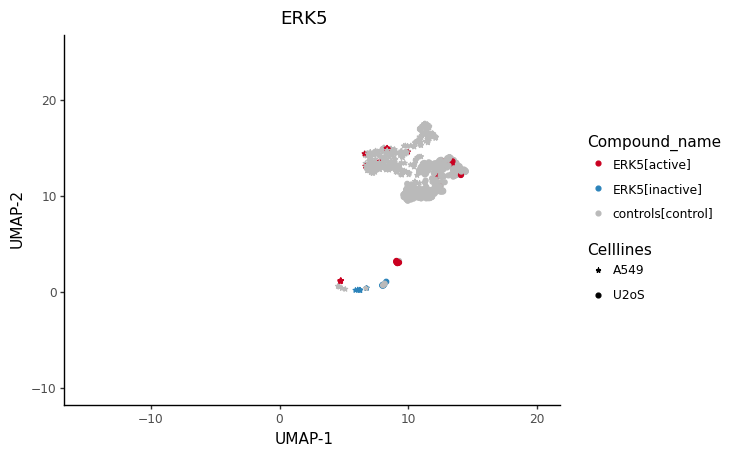

<ggplot: (7029549709)>

In [170]:
# options = ['controls[control]', 'DCLK1[active]', 'DCLK1[inactive]']


# d = combined.loc[combined['Metadata_compound_name'].isin(options)]

# d.head()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target3', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("DCLK1") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_DCLK.pdf', plot = g, path = outpath)

# g 

# options = ['controls[control]', 'PIN1[active]', 'PIN1[inactive]']


# d = combined.loc[combined['Metadata_Target3'].isin(options)]

# d.head()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target3', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("PIN1") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_PIN1.pdf', plot = g, path = outpath)

# g 


# options = ['controls[control]', 'SECRET[active (protac)]', 'SECRET[inactive (protac)]']


# d = combined.loc[combined['Metadata_Target3'].isin(options)]

# d.head()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target3', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("SECRET") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_SECRET.pdf', plot = g, path = outpath)

# g 

options = ['controls[control]', 'CDK14 / pan-TAIRE[covalent]', 'CDK14 / pan-TAIRE[reversible]']


# d = combined.loc[combined['Metadata_Target3'].isin(options)]


# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target3', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.ggtitle("CDK14 / pan-TAIRE") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_CDK14_pan-TAIRE.pdf', plot = g, path = outpath)

# g 

options = ['controls[control]', 'ERK5[active]', 'ERK5[inactive]']


d = combined.loc[combined['Metadata_Target3'].isin(options)]


g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target3', shape="Metadata_cell_line")) + \
    gg.geom_point(size = 1.5) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("ERK5") + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
ggsave(filename='umap_compound_treatment_ERK5.pdf', plot = g, path = outpath)

g 






In [122]:
# options = ['C1', 'C2', 'C3', 'C4'] 

# d = combined.loc[combined['Metadata_Target'].isin(options)]


# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target_new', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 2.5) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#f4a582","#2b83ba", "#404040"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_controls.pdf', plot = g, path = outpath)

# g 

# options = ['controls', 'C1', 'C2', 'C3', 'C4'] 

# d = combined.loc[combined['Metadata_Target'].isin(options)]


# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target_new', shape="Metadata_cell_line")) + \
#     gg.geom_point(size = 1) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() + \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#f4a582","#2b83ba", "#404040", "#bababa"]) + \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
# ggsave(filename='umap_compound_treatment_controls_DMSO.pdf', plot = g, path = outpath)

# g 

options = ['controls', 'C1', 'C2', 'C3', 'C4', 'DCLK1']


d = combined.loc[combined['Metadata_Target'].isin(options)]

d.head()
g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target', shape="Metadata_Annotation")) + \
    gg.geom_point(size = 3) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#f4a582","#2b83ba", "#404040", "#bababa", "#abdda4"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
ggsave(filename='umap_compound_treatment_DCLK.pdf', plot = g, path = outpath)

g 



/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Figures_new/UMAP/umap_compound_treatment_DCLK.pdf
/Users/habbasi/plotnine/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 2 values. 3 were requested from it.
/Users/habbasi/plotnine/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 16 rows containing missing values.
/Users/habbasi/plotnine/plotnine/scales/scale_manual.py:27: PlotnineWarning: Palette can return a maximum of 2 values. 3 were requested from it.


ValueError: arrays must all be same length

In [83]:
#options = ['controls', 'DCLK1', 'C1', 'C2', 'C3', 'C4'] 
options = ['conrols','C1', 'C2', 'C3', 'C4'] 

d = combined.loc[combined['Metadata_Target'].isin(options)]
d.Metadata_Target.unique()
# g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target')) + \
#     gg.geom_point(size = 1) + \
#     gg.xlab("UMAP-1") + \
#     gg.ylab("UMAP-2") + \
#     gg.xlim(-15,20) + \
#     gg.ylim(-10,25) + \
#     gg.theme_classic() 
# #+ \
# #     gg.scale_colour_manual(name= 'Compound_name', values=["#bdbdbd","#cab2d6","#ff7f00", "#fdbf6f", "#e31a1c"]) 
# g   


array(['C4', 'C3', 'C2', 'C1'], dtype=object)

In [103]:
for i, p in enumerate(combined.Metadata_Target.unique()):
    
    d = combined.query("Metadata_Target == 'control' and Metadata_Target == @p" )
    
    g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target')) + \
    gg.geom_point(size = 1) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() + \
    gg.labs(title= 'UMAP' +  str(i)) 
    ggsave(filename=str(i)+'.png', plot = g, path = figpath)

/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/fig/0.png
/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/fig/1.png


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

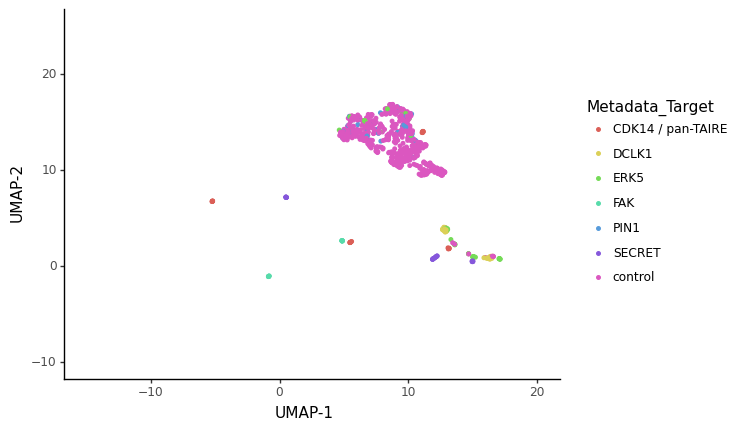

<ggplot: (7025851581)>

In [90]:
p = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Target')) + \
    gg.geom_point(size = 1) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() 
#+ \
#     gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
#                                                          "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
#                                                          "#a6cee3", "#f7fcfd", "#999999", "#a65628",
#                                                          "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
#                                                          "#000000"]) 
#+ \
#     gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o']) + \
  
   
   


    

#ggsave(filename='Drug_target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

# Principle Component Analysis

In [28]:
# Fit and transform with t-SNE

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, learning_rate=100, n_iter=1000, perplexity=30)


#Project the data in 2D 
x_2d = model.fit_transform(df.loc[:, variables].values)

test = pd.DataFrame(x_2d, columns= ['t-SNE-1', 't-SNE-2'])

combined = test.merge(df.loc[:, metadata], left_index=True, right_index=True)
combined.head()


,t-SNE-1,t-SNE-2,Metadata_Plate,Metadata_Well,Metadata_broad_sample,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_well_position,Metadata_mg_per_ml,...,Metadata_pert_id_vendor,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_label,Metadata_chemist,Metadata_compound_name,Metadata_Annotation,Metadata_Target,Metadata_Broad_barcode
0,-2.315136,-21.074286,BR00100032,A01,DMSO,BR00100032,C-7210-01-CMP-008-gray,A549,A01,0.0,...,NaN,control,DMSO,control,DMSO,Drug Repurposing,DMSO,control,NaN,NaN
1,9.051973,-20.357140,BR00100032,A02,DMSO,BR00100032,C-7210-01-CMP-008-gray,A549,A02,0.0,...,NaN,control,DMSO,control,DMSO,Drug Repurposing,DMSO,control,NaN,NaN
2,7.897429,-18.913342,BR00100032,A03,DMSO,BR00100032,C-7210-01-CMP-008-gray,A549,A03,0.0,...,NaN,control,DMSO,control,DMSO,Drug Repurposing,DMSO,control,NaN,NaN
3,-3.685621,-26.284986,BR00100032,A04,DMSO,BR00100032,C-7210-01-CMP-008-gray,A549,A04,0.0,...,NaN,control,DMSO,control,DMSO,Drug Repurposing,DMSO,control,NaN,NaN
4,-6.782238,-26.603998,BR00100032,A05,DMSO,BR00100032,C-7210-01-CMP-008-gray,A549,A05,0.0,...,NaN,control,DMSO,control,DMSO,Drug Repurposing,DMSO,control,NaN,NaN


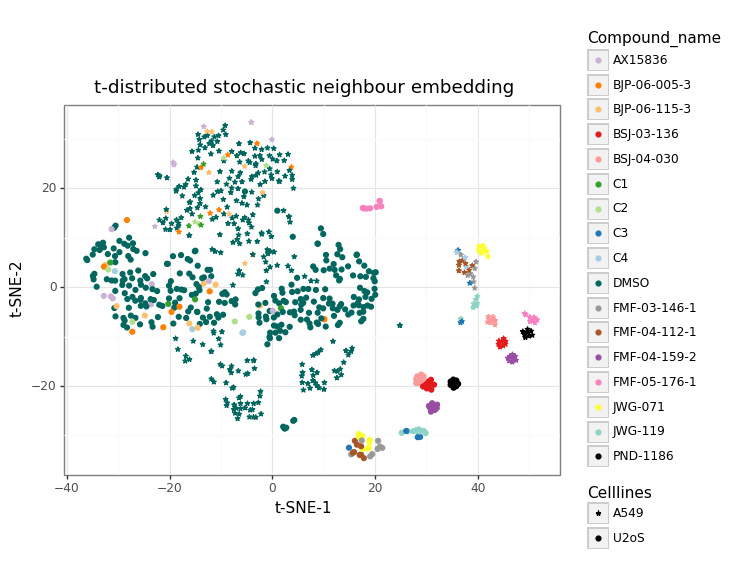

<ggplot: (7015537949)>

In [29]:
p = gg.ggplot(combined, gg.aes(x='t-SNE-1', y='t-SNE-2', color='Metadata_compound_name', label='Metadata_compound_name', shape='Metadata_cell_line')) + \
    gg.geom_point() + \
    gg.theme_bw() + \
    gg.xlab("t-SNE-1") + \
    gg.ylab("t-SNE-2") + \
    gg.ggtitle("t-distributed stochastic neighbour embedding") + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
                                                         "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
                                                         "#a6cee3", "#01665e", "#999999", "#a65628",
                                                         "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
                                                         "#000000"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])

    

#ggsave(filename='Gray_project_t-SNE.pdf', plot = p, path = '/Users/habbasi/Desktop/')
    
p
